In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import resample


In [2]:

# Load the dataset
file_path = 'waste_sensor_data (1).csv'
data = pd.read_csv(file_path)


In [3]:
data

,sensor_id,timestamp,waste_type,inductive_property,capacitive_property,moisture_property,infrared_property
0,3,2023-09-01 12:00:00,non_recyclable,0.90,0.12,0.47,16.27
1,4,2023-09-01 12:15:00,recyclable,1.18,0.66,0.33,36.00
2,3,2023-09-01 12:30:00,non_recyclable,0.87,0.14,0.83,58.89
3,2,2023-09-01 12:45:00,organic,1.00,0.37,0.52,91.80
4,3,2023-09-01 13:00:00,recyclable,1.39,0.88,0.76,98.83
...,...,...,...,...,...,...,...
19995,4,2024-03-27 18:45:00,non_recyclable,1.30,0.41,0.46,58.57
19996,4,2024-03-27 19:00:00,non_recyclable,0.68,0.87,0.71,12.00
19997,3,2024-03-27 19:15:00,non_recyclable,1.12,0.79,0.07,29.03
19998,2,2024-03-27 19:30:00,organic,1.18,0.05,0.05,40.17


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sensor_id            20000 non-null  int64  
 1   timestamp            20000 non-null  object 
 2   waste_type           20000 non-null  object 
 3   inductive_property   20000 non-null  float64
 4   capacitive_property  20000 non-null  float64
 5   moisture_property    20000 non-null  float64
 6   infrared_property    20000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.1+ MB


In [5]:
data.describe()

,sensor_id,inductive_property,capacitive_property,moisture_property,infrared_property
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2.495900,1.003058,0.501873,0.501766,50.180508
std,1.115188,0.230327,0.288173,0.288086,28.836594
min,1.000000,0.600000,0.000000,0.000000,0.010000
25%,2.000000,0.810000,0.250000,0.250000,25.337500
50%,2.000000,1.000000,0.510000,0.500000,50.090000
75%,3.000000,1.200000,0.750000,0.750000,74.972500
max,4.000000,1.400000,1.000000,1.000000,100.000000


In [6]:
data.head()

,sensor_id,timestamp,waste_type,inductive_property,capacitive_property,moisture_property,infrared_property
0,3,2023-09-01 12:00:00,non_recyclable,0.90,0.12,0.47,16.27
1,4,2023-09-01 12:15:00,recyclable,1.18,0.66,0.33,36.00
2,3,2023-09-01 12:30:00,non_recyclable,0.87,0.14,0.83,58.89
3,2,2023-09-01 12:45:00,organic,1.00,0.37,0.52,91.80
4,3,2023-09-01 13:00:00,recyclable,1.39,0.88,0.76,98.83


In [7]:
data.tail()

,sensor_id,timestamp,waste_type,inductive_property,capacitive_property,moisture_property,infrared_property
19995,4,2024-03-27 18:45:00,non_recyclable,1.30,0.41,0.46,58.57
19996,4,2024-03-27 19:00:00,non_recyclable,0.68,0.87,0.71,12.00
19997,3,2024-03-27 19:15:00,non_recyclable,1.12,0.79,0.07,29.03
19998,2,2024-03-27 19:30:00,organic,1.18,0.05,0.05,40.17
19999,4,2024-03-27 19:45:00,non_recyclable,1.22,0.02,0.31,18.62


In [8]:
data.isnull()

,sensor_id,timestamp,waste_type,inductive_property,capacitive_property,moisture_property,infrared_property
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

sensor_id              0
timestamp              0
waste_type             0
inductive_property     0
capacitive_property    0
moisture_property      0
infrared_property      0
dtype: int64

In [10]:
data.dtypes

sensor_id                int64
timestamp               object
waste_type              object
inductive_property     float64
capacitive_property    float64
moisture_property      float64
infrared_property      float64
dtype: object

In [11]:
data.duplicated().sum()

0

In [12]:
data['waste_type'].unique()

array(['non_recyclable', 'recyclable', 'organic'], dtype=object)

In [13]:
data['waste_type'].value_counts()


waste_type
non_recyclable    6729
organic           6653
recyclable        6618
Name: count, dtype: int64

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
print(f"Shape of feature matrix before: {X.shape}, after: {X_poly.shape}")


NameError: name 'X' is not defined

In [207]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
print(f"Shape before PCA: {X.shape}, after PCA: {X_reduced.shape}")



Shape before PCA: (20187, 6), after PCA: (20187, 1)


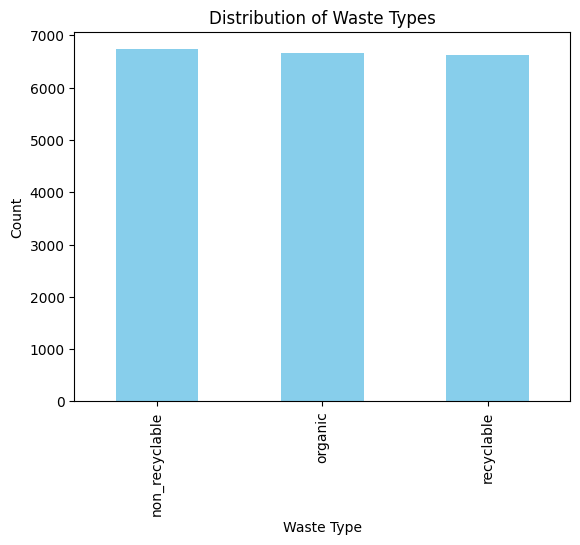

In [154]:
import matplotlib.pyplot as plt

data['waste_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Waste Types')
plt.xlabel('Waste Type')
plt.ylabel('Count')
plt.show()


In [155]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data['waste_type'] = data['waste_type']
grouped_data = numeric_data.groupby('waste_type').mean()
print(grouped_data)

                sensor_id  inductive_property  capacitive_property  \
waste_type                                                           
non_recyclable   2.494873            0.999571             0.503284   
organic          2.493762            1.005204             0.503162   
recyclable       2.499093            1.004448             0.499140   

                moisture_property  infrared_property  
waste_type                                            
non_recyclable           0.500065          49.945595  
organic                  0.502779          50.429857  
recyclable               0.502477          50.168693  


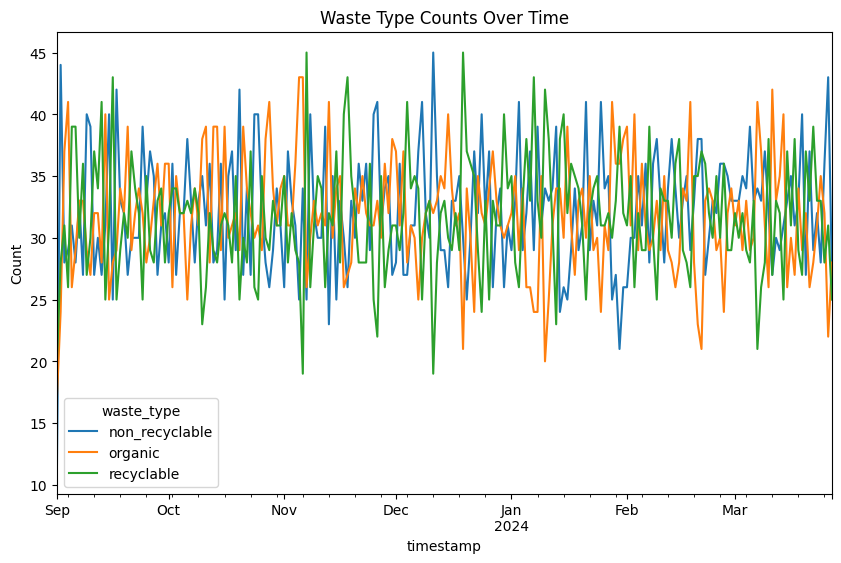

In [156]:
data.set_index('timestamp').groupby('waste_type')['sensor_id'].resample('D').count().unstack(0).plot(figsize=(10, 6))
plt.title('Waste Type Counts Over Time')
plt.ylabel('Count')
plt.show()

In [157]:
data.nunique()

sensor_id                  4
timestamp              20000
waste_type                 3
inductive_property        81
capacitive_property      101
moisture_property        101
infrared_property       8648
dtype: int64

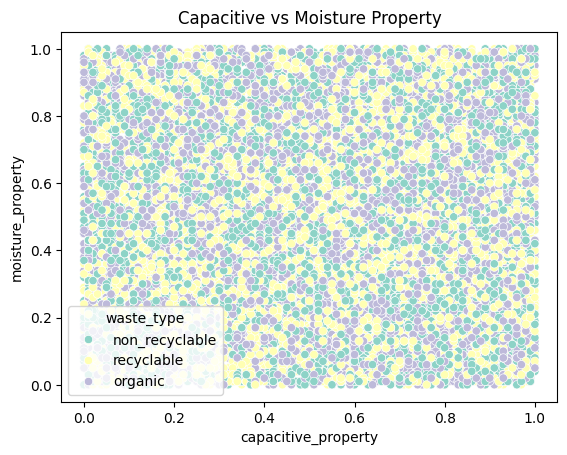

In [166]:
sns.scatterplot(data=data, x='capacitive_property', y='moisture_property', hue='waste_type', palette='Set3')
plt.title('Capacitive vs Moisture Property')
plt.show()

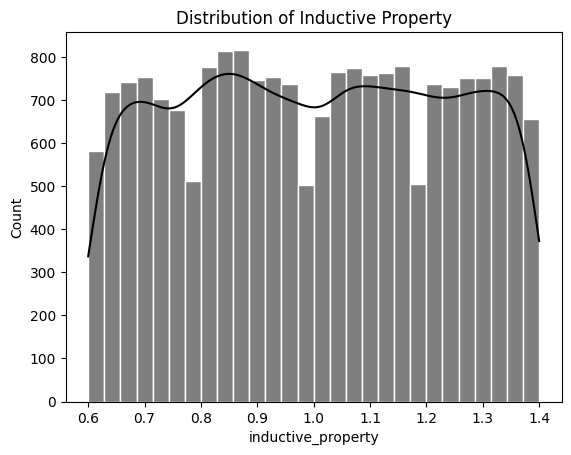

In [174]:
sns.histplot(data['inductive_property'], kde=True, color='black', edgecolor='white')
plt.title('Distribution of Inductive Property')
plt.show()

In [175]:
import pandas as pd
# Example DataFrame
new_data = pd.DataFrame({
    'inductive_property': [6.5, 0.10],
    'capacitive_property':[6.2, 0.4],
    'moisture_property': [7.2, 5.60],
    'infrared_property': [9.0, 5.0]
})

# Get the shape of the DataFrame
data_shape = new_data.shape
print(f"Shape of the data: {data_shape}")

# Get the column names of the DataFrame
column_names = new_data.columns
print(f"Column names: {column_names}")

Shape of the data: (2, 4)
Column names: Index(['inductive_property', 'capacitive_property', 'moisture_property',
       'infrared_property'],
      dtype='object')


In [15]:

# Step 1: Preprocess the Dataset
# Convert 'timestamp' to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])
# Separate features and target
X = data.drop(columns=['waste_type'])  # Replace 'waste_type' with your target column name
y = data['waste_type']

# Encode the target variable (if it is categorical)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature Scaling
# Drop the 'timestamp' column before scaling
X_train_scaled = X_train.drop(columns=['timestamp'])
X_test_scaled = X_test.drop(columns=['timestamp'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

In [177]:
data.groupby('waste_type').agg(['mean', 'median', 'std', 'min', 'max'])

sensor_id                           \
                    mean median       std min max   
waste_type                                          
non_recyclable  2.494873    2.0  1.112976   1   4   
organic         2.493762    2.0  1.114532   1   4   
recyclable      2.499093    2.0  1.118253   1   4   

                                   timestamp                      \
                                        mean              median   
waste_type                                                         
non_recyclable 2023-12-15 04:54:08.238965760 2023-12-15 00:15:00   
organic        2023-12-13 19:59:23.204569344 2023-12-12 20:00:00   
recyclable     2023-12-14 22:37:10.553037056 2023-12-16 06:52:30   

                                                               \
                                      std                 min   
waste_type                                                      
non_recyclable 60 days 08:19:13.689414177 2023-09-01 12:00:00   
organic        59 days 22:53:50.333671393 2023-09-01 12:45:00   
recyclable     60 days 02:56:53.654804379 2023-09-01 12:15:00   

                                    ... moisture_property                   \
                               max  ...              mean median       std   
waste_type                          ...                                      
non_recyclable 2024-03-27 19:45:00  ...          0.500065   0.50  0.287643   
organic        2024-03-27 19:30:00  ...          0.502779   0.51  0.290083   
recyclable     2024-03-27 18:30:00  ...          0.502477   0.50  0.286555   

                         infrared_property                                  
                min  max              mean median        std   min     max  
waste_type                                                                  
non_recyclable  0.0  1.0         49.945595  49.81  28.825908  0.01  100.00  
organic         0.0  1.0         50.429857  50.30  28.913254  0.01  100.00  
recyclable      0.0  1.0         50.168693  50.09  28.772517  0.02   99.98  

[3 rows x 30 columns]

C:\Users\aubal\AppData\Local\Temp\ipykernel_7684\3152235242.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='waste_type', y='inductive_property', data=balanced_data, palette='muted')


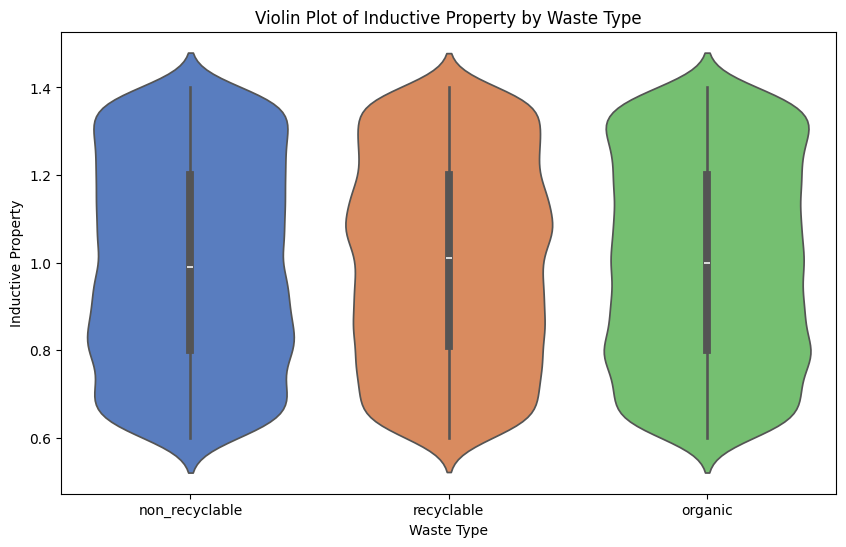

In [178]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='waste_type', y='inductive_property', data=balanced_data, palette='muted')
plt.title('Violin Plot of Inductive Property by Waste Type')
plt.xlabel('Waste Type')
plt.ylabel('Inductive Property')
plt.show()

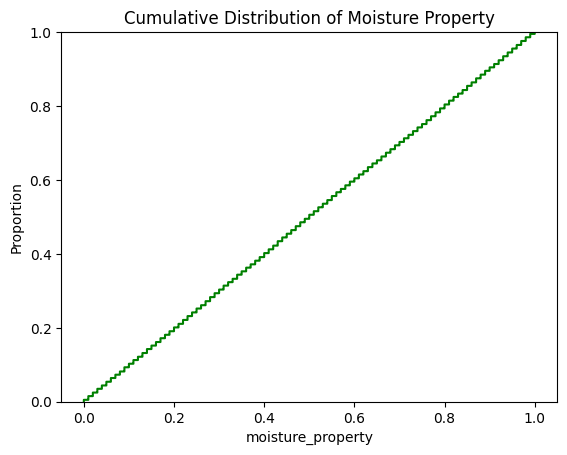

In [203]:
sns.ecdfplot(data['moisture_property'], color='green')
plt.title('Cumulative Distribution of Moisture Property')
plt.show()

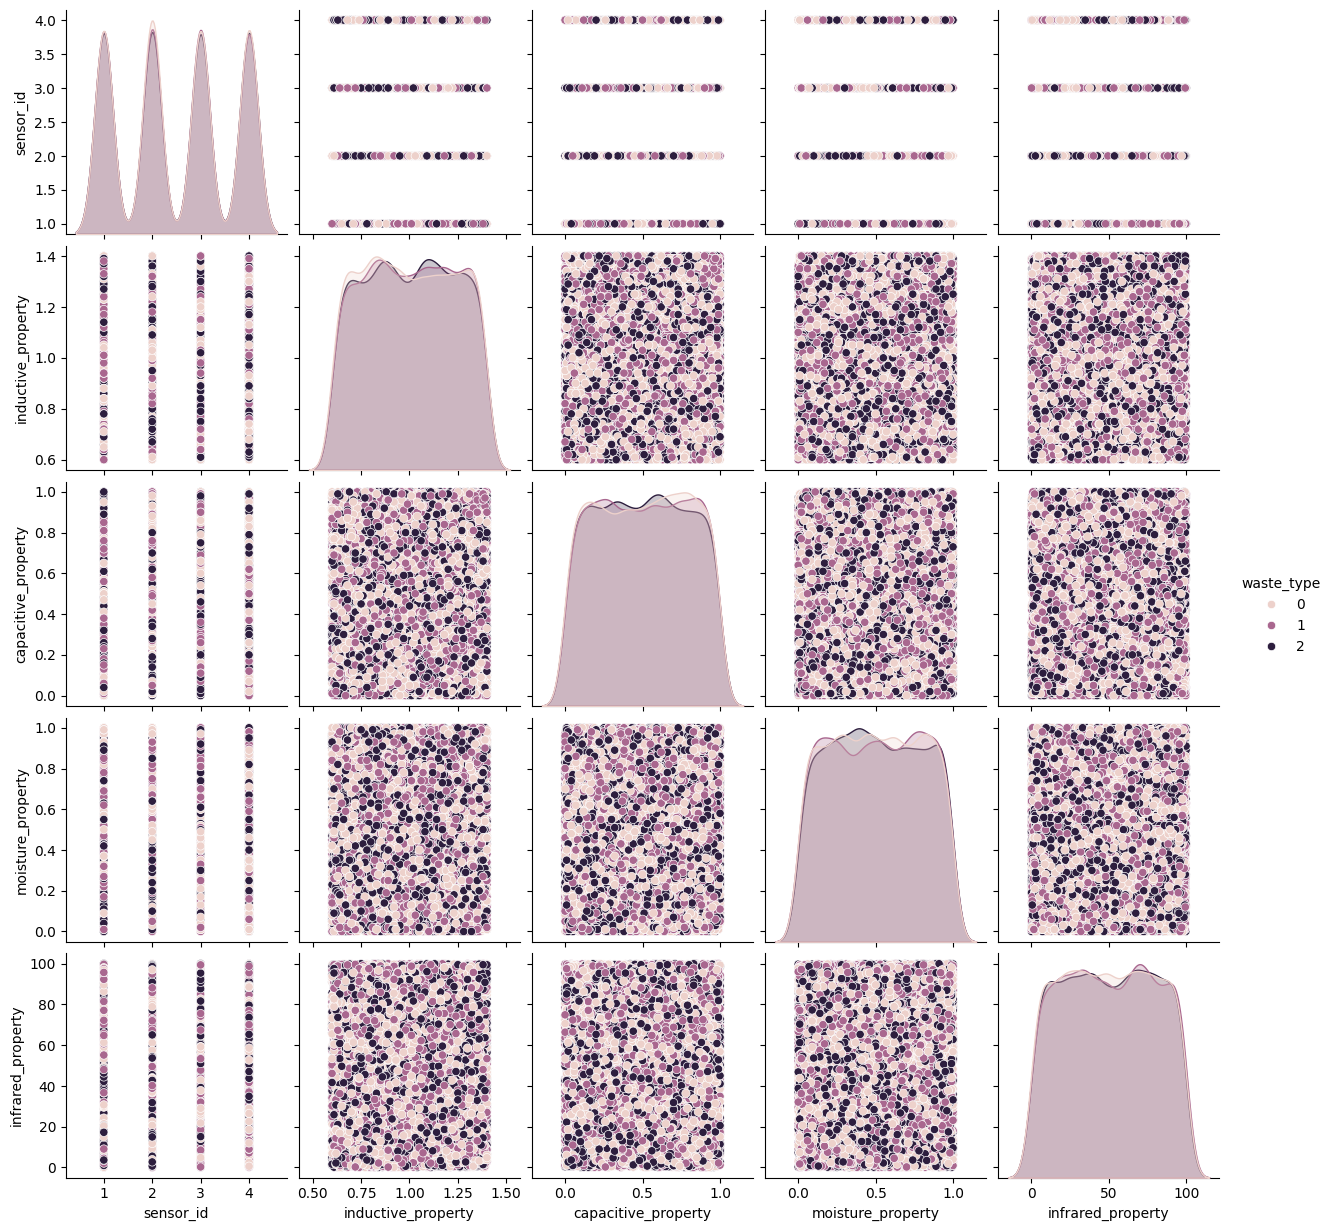

In [179]:

# Step 2: Visualize Various Plots
# Pairplot
sns.pairplot(pd.concat([X, pd.DataFrame(y, columns=['waste_type'])], axis=1), hue='waste_type')
plt.show()


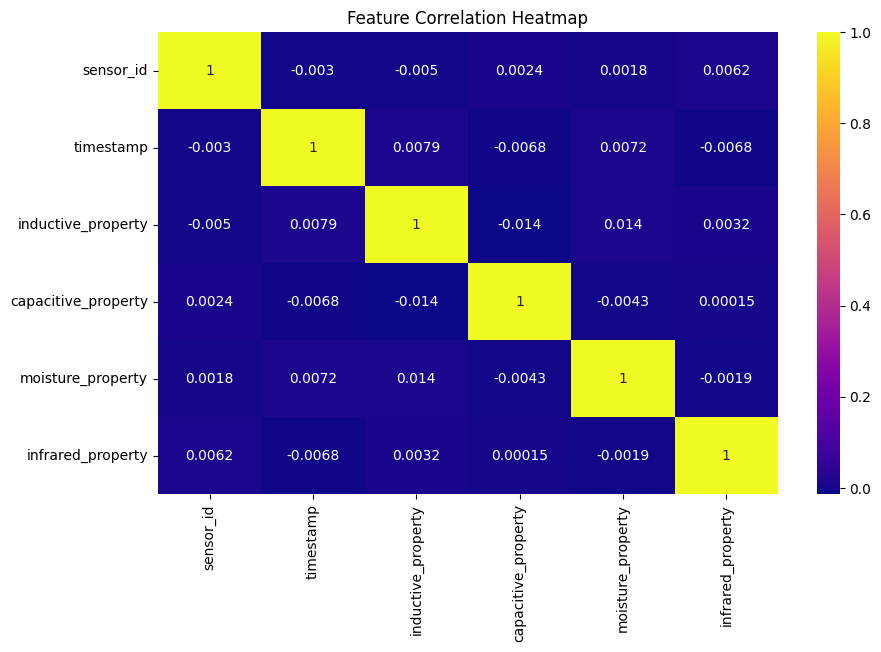

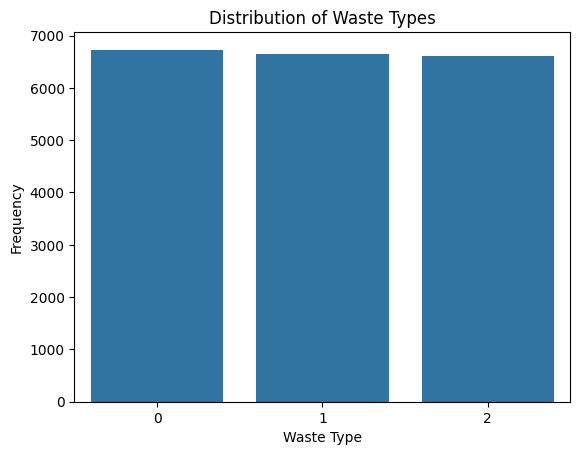

In [180]:

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.drop(columns=['waste_type']).corr(), annot=True, cmap='plasma')
plt.title('Feature Correlation Heatmap')
plt.show()

# Distribution of target variable
sns.countplot(x=y)
plt.title('Distribution of Waste Types')
plt.xlabel('Waste Type')
plt.ylabel('Frequency')
plt.show()


In [16]:

# Balancing the dataset
class_distribution = data['waste_type'].value_counts()
majority_class = data[data['waste_type'] == class_distribution.idxmax()]
balanced_data = majority_class.copy()

for waste_type, count in class_distribution.items():
    if waste_type != class_distribution.idxmax():
        minority_class = data[data['waste_type'] == waste_type]
        resampled_minority = resample(minority_class, 
                                      replace=True, 
                                      n_samples=class_distribution.max(), 
                                      random_state=42)
        balanced_data = pd.concat([balanced_data, resampled_minority])


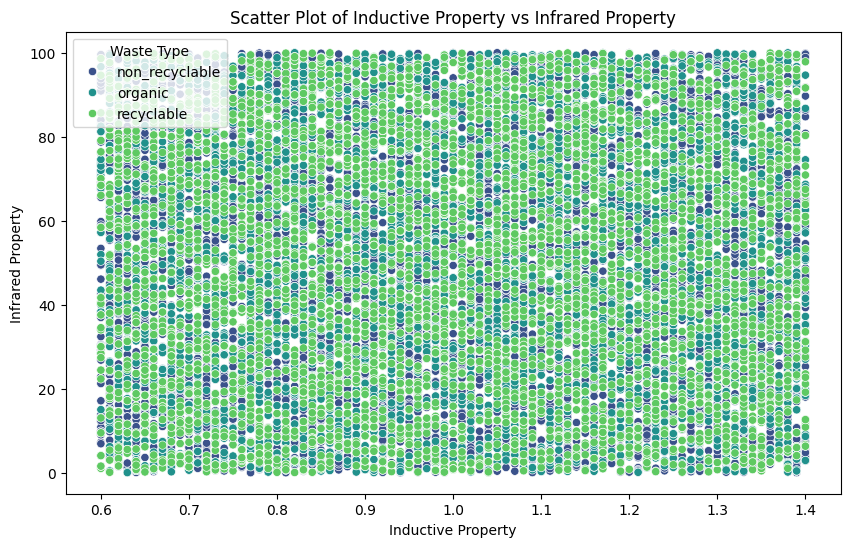

In [17]:
# Scatter plot of two features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='inductive_property', y='infrared_property', hue='waste_type', data=balanced_data, palette='viridis')
plt.title('Scatter Plot of Inductive Property vs Infrared Property')
plt.xlabel('Inductive Property')
plt.ylabel('Infrared Property')
plt.legend(title='Waste Type')
plt.show()

In [18]:
data['inductive_capacitive'] = data['inductive_property'] * data['capacitive_property']
data['moisture_infrared'] = data['moisture_property'] * data['infrared_property']
print(data.head())


   sensor_id           timestamp      waste_type  inductive_property  \
0          3 2023-09-01 12:00:00  non_recyclable                0.90   
1          4 2023-09-01 12:15:00      recyclable                1.18   
2          3 2023-09-01 12:30:00  non_recyclable                0.87   
3          2 2023-09-01 12:45:00         organic                1.00   
4          3 2023-09-01 13:00:00      recyclable                1.39   

   capacitive_property  moisture_property  infrared_property  \
0                 0.12               0.47              16.27   
1                 0.66               0.33              36.00   
2                 0.14               0.83              58.89   
3                 0.37               0.52              91.80   
4                 0.88               0.76              98.83   

   inductive_capacitive  moisture_infrared  
0                0.1080             7.6469  
1                0.7788            11.8800  
2                0.1218            48.8787  
3 

In [19]:

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Feature Engineering
balanced_data['inductive_to_capacitive'] = balanced_data['inductive_property'] / (balanced_data['capacitive_property'] + 1e-9)
balanced_data['infrared_to_moisture'] = balanced_data['infrared_property'] / (balanced_data['moisture_property'] + 1e-9)

# Encode target variable ('waste_type')
label_encoder = LabelEncoder()
balanced_data['waste_type_encoded'] = label_encoder.fit_transform(balanced_data['waste_type'])


In [20]:

# Feature Selection
features = [
    'inductive_property', 'capacitive_property', 'moisture_property', 
    'infrared_property', 'inductive_to_capacitive', 'infrared_to_moisture'
]
X = balanced_data[features]
y = balanced_data['waste_type_encoded']


In [21]:

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction with PCA
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)


In [22]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)


In [23]:
from sklearn.ensemble import RandomForestClassifier

base_rf = RandomForestClassifier(random_state=42)

In [189]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [190]:

# Apply Boosting to Random Forest
base_rf = RandomForestClassifier(random_state=42, n_estimators=28,max_depth=7, min_samples_split=3, min_samples_leaf=2)
boosted_rf = AdaBoostClassifier(estimator=base_rf, n_estimators=45, random_state=42)

In [191]:

# Fit the boosted modelt4fs
boosted_rf.fit(X_train, y_train)


c:\Users\aubal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=7,
                                                    min_samples_leaf=2,
                                                    min_samples_split=3,
                                                    n_estimators=28,
                                                    random_state=42),
                   n_estimators=45, random_state=42)

In [192]:
from joblib import dump

# Save the model to a file
model_filename = 'boosted_rf_model_nnn.joblib'
dump(boosted_rf, model_filename)

['boosted_rf_model_nnn.joblib']

In [24]:

# Evaluate the model on training and testing sets
y_train_pred = boosted_rf.predict(X_train)
y_test_pred = boosted_rf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


NameError: name 'boosted_rf' is not defined

In [25]:

# Display results
print(f"Boosted Random Forest Training Accuracy: {train_accuracy:.2f}")
print(f"Boosted Random Forest Testing Accuracy: {test_accuracy:.2f}")

print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred, target_names=label_encoder.classes_))

print("\nTesting Set Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


NameError: name 'train_accuracy' is not defined

In [26]:
from joblib import load

# Load the model from the file
boosted_rf= load('boosted_rf_model_nnn.joblib')

In [27]:

# Evaluate the model on training and testing sets
y_train_pred = boosted_rf.predict(X_train)
y_test_pred = boosted_rf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


In [28]:

# Display results
print(f"Boosted Random Forest Training Accuracy: {train_accuracy:.2f}")
print(f"Boosted Random Forest Testing Accuracy: {test_accuracy:.2f}")

print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred, target_names=label_encoder.classes_))

print("\nTesting Set Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


Boosted Random Forest Training Accuracy: 0.98
Boosted Random Forest Testing Accuracy: 0.61

Training Set Classification Report:
                precision    recall  f1-score   support

non_recyclable       0.97      0.99      0.98      5383
       organic       0.99      0.98      0.98      5383
    recyclable       0.99      0.98      0.98      5383

      accuracy                           0.98     16149
     macro avg       0.98      0.98      0.98     16149
  weighted avg       0.98      0.98      0.98     16149


Testing Set Classification Report:
                precision    recall  f1-score   support

non_recyclable       0.52      0.53      0.52      1346
       organic       0.66      0.66      0.66      1346
    recyclable       0.65      0.63      0.64      1346

      accuracy                           0.61      4038
     macro avg       0.61      0.61      0.61      4038
  weighted avg       0.61      0.61      0.61      4038



In [29]:
train_accuracy_percentage = train_accuracy * 100
test_accuracy_percentage = test_accuracy * 100

print(f"Boosted Random Forest Training Accuracy: {train_accuracy_percentage:.2f}%")
print(f"Boosted Random Forest Testing Accuracy: {test_accuracy_percentage:.2f}%")

Boosted Random Forest Training Accuracy: 98.11%
Boosted Random Forest Testing Accuracy: 60.72%


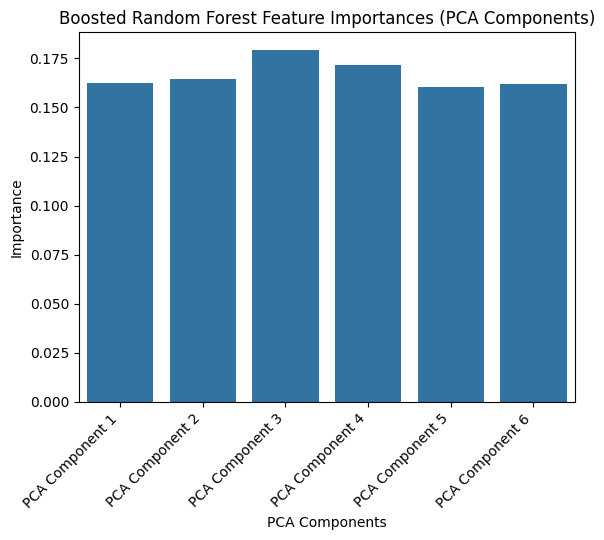

In [30]:

# Plot Feature Importances for Boosted Random Forest
feature_importances = boosted_rf.feature_importances_
pca_feature_names = [f'PCA Component {i+1}' for i in range(len(feature_importances))]

sns.barplot(x=pca_feature_names, y=feature_importances)
plt.title("Boosted Random Forest Feature Importances (PCA Components)")
plt.xlabel("PCA Components")
plt.xticks(rotation=45, ha='right') 
plt.ylabel("Importance")
plt.show()

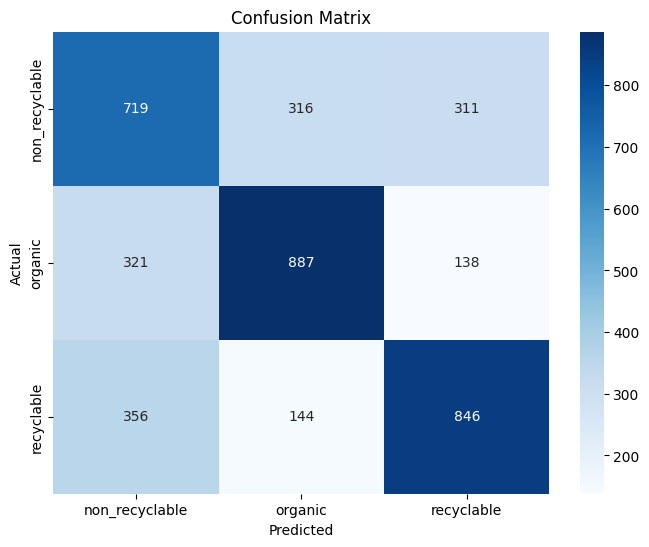

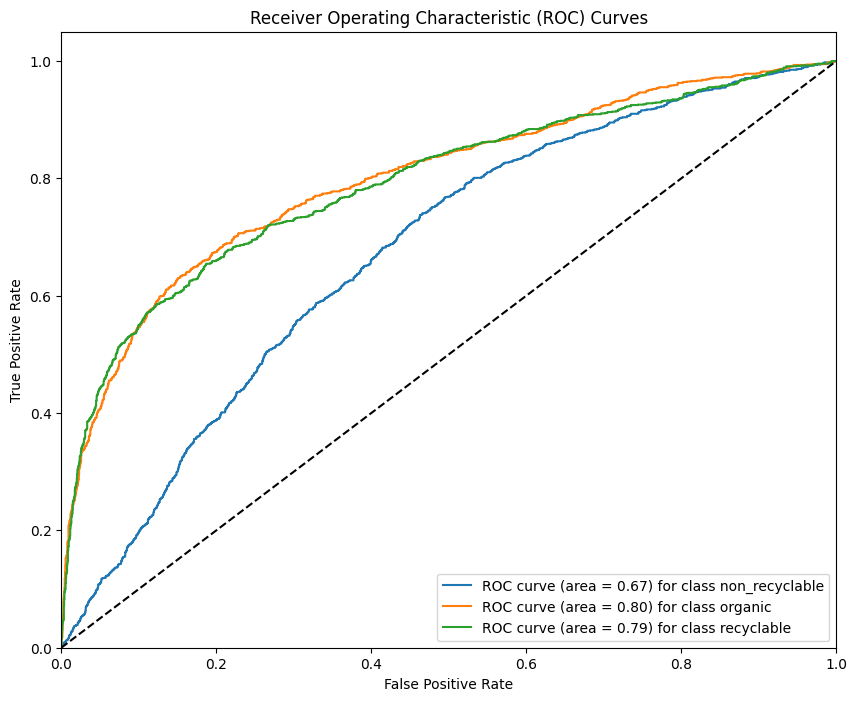

In [31]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curves
y_test_prob = boosted_rf.predict_proba(X_test)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_test_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {label_encoder.classes_[i]}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

In [32]:
# New sensor data
new_data = pd.DataFrame({
    'inductive_property': [0.32],
    'capacitive_property': [1.2],
    'moisture_property': [0.2],
    'infrared_property': [0.3]
})

# Feature Engineering
new_data['inductive_to_capacitive'] = new_data['inductive_property'] / (new_data['capacitive_property'] + 1e-9)
new_data['infrared_to_moisture'] = new_data['infrared_property'] / (new_data['moisture_property'] + 1e-9)

# Select features
new_X = new_data[features]

# Feature Scaling
new_X_scaled = scaler.transform(new_X)

# Dimensionality Reduction with PCA
new_X_pca = pca.transform(new_X_scaled)

# Predict the class of new data
new_predictions = boosted_rf.predict(new_X_pca)

# Decode the predicted class labels
new_predictions_labels = label_encoder.inverse_transform(new_predictions)

# Output the classification result
print(f"Sensor data is classified as: {new_predictions_labels[0]}")

Sensor data is classified as: non_recyclable


In [33]:
# Example sensor data for the 'organic' class
organic_data = pd.DataFrame({
    'inductive_property': [1],
    'capacitive_property': [0.21],
    'moisture_property': [0.51],
    'infrared_property': [91.0]
})

# Feature Engineering
organic_data['inductive_to_capacitive'] = organic_data['inductive_property'] / (organic_data['capacitive_property'] + 1e-9)
organic_data['infrared_to_moisture'] = organic_data['infrared_property'] / (organic_data['moisture_property'] + 1e-9)

# Select features
organic_X = organic_data[features]

# Feature Scaling
organic_X_scaled = scaler.transform(organic_X)

# Dimensionality Reduction with PCA
organic_X_pca = pca.transform(organic_X_scaled)

# Predict the class of new data
organic_predictions = boosted_rf.predict(organic_X_pca)

# Decode the predicted class labels
organic_predictions_labels = label_encoder.inverse_transform(organic_predictions)

# Output the classification result
print(f"Sensor data is classified as: {organic_predictions_labels[0]}")

Sensor data is classified as: organic
